# EXPLORATORY DATA ANALYSIS

# importing data 

In [3]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')


we will load the data onto the notebook

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-train_set.csv')

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/df-test_set.csv')

In [4]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/onkarabiletshele/Regression_AM6_DSFT/main/Data/sample_submission.csv')

In [5]:
index = test['Index']
test = test.drop('Index', axis=1)

In [6]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
train.shape

(64376, 13)

The shape command shows us that we have 64376 rows of data and 13 features.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


The info command confirms our categorical and numerical features. If a feature (variable) is
categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64.
This command also shows us that out of the 1338 none of the features contain any null values.

In [6]:
train.describe(include='object')

,Province,Container,Size_Grade,Commodities,Date
count,64376,64376,64376,64376,64376
unique,22,153,47,270,147
top,CAPE,PP100,1M,POTATO (WASHED) MONDIAL,2020-07-01
freq,14635,12129,10713,4134,870


In [9]:
 train.replace([np.inf, -np.inf], np.nan, inplace=True)

## Graphical analysis

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

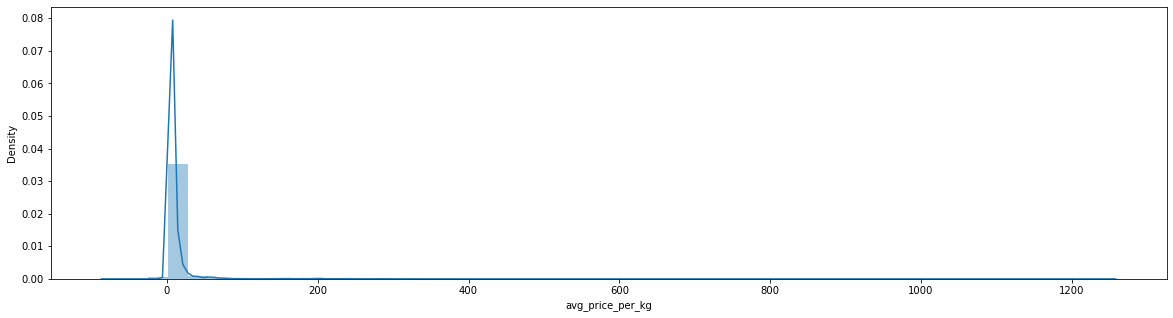

In [10]:
# plot histogram for the numeric feature
fig, ax = plt.subplots(figsize=(20,5))
sns.distplot(train['avg_price_per_kg'], kde=True)

## Missing Values Detection

In [13]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Correllation #

In [14]:
# Lydia
# check the train correlation 
# plot the heat map 
# pairplot 

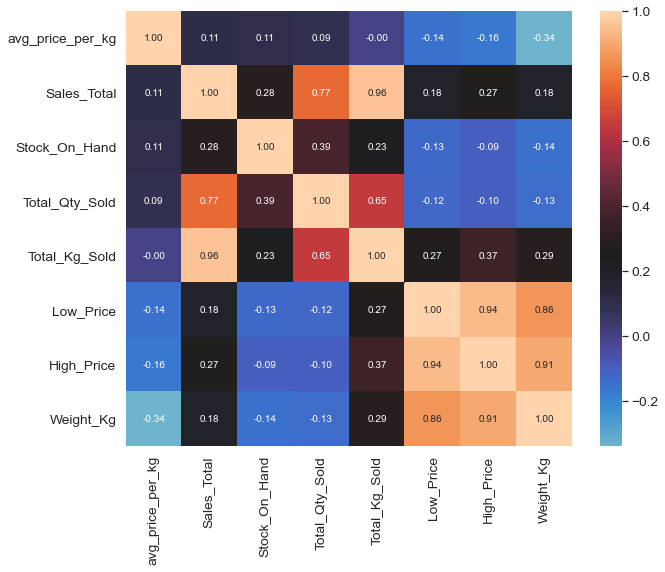

In [484]:
plt.figure(figsize=(10,8))

#avg_price_per_kg correlation matrix
cols = train.corr().nlargest(10, 'avg_price_per_kg')['avg_price_per_kg'].index
corr_mat = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

#Plot corr matrix
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, center=0.25)
plt.show()

# Outliers Detection #

In [18]:
# Lydia
# check train kurtosis for outliers
# comment on the kurtosis
# plot the boxplots for each numerical feature
#fig, axes = plt.subplots(2, 4, figsize=(20, 10))
#
#fig.suptitle('BOXPLOTS')
#
#sns.boxplot(ax=axes[0, 0], data=train, x='Weight_Kg')
#sns.boxplot(ax=axes[0, 1], data=train, x='Low_Price')
#sns.boxplot(ax=axes[0, 2], data=train, x='High_Price')
#sns.boxplot(ax=axes[0, 3], data=train, x='Sales_Total')
#sns.boxplot(ax=axes[1, 0], data=train, x='Total_Qty_Sold')
#sns.boxplot(ax=axes[1, 1], data=train, x='Total_Kg_Sold')
#sns.boxplot(ax=axes[1, 2], data=train, x='Stock_On_Hand')
#sns.boxplot(ax=axes[1, 3], data=train, x='avg_price_per_kg')

# Checking the distribution #